In [19]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from getpass import getpass


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/age-dataset/AgeDataset-V1.csv


# An analysis on the age dataset 

We shall beegin first by doing a univariate analysis of each column where possible 

In [96]:
age=pd.read_csv('../input/age-dataset/AgeDataset-V1.csv')
age.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0


In [97]:
age = age[age['Birth year']>0]
age['Country']=age['Country'].astype(str)
age['Country']=age['Country'].apply(lambda x:x.split(';')[0])
age = age[age['Name'] != 'Issa Annamoradnejad']


age['Birth year'] = age['Birth year'].astype(int)
age['Death year'] = age['Death year'].astype(int)
age['Age of death'] = age['Age of death'].astype(int)

In [98]:
age.nunique()

Id                   1222414
Name                 1130326
Short description     512053
Gender                    20
Country                 1074
Occupation              9304
Birth year              1912
Death year              1908
Manner of death          206
Age of death             130
dtype: int64

There seem to be some variances of the same gender here. Let's clean it up a little. 

In [99]:

age['Gender'] = age['Gender'].apply(lambda x: "Other" if x not in ['Male', 'Female'] else x)


age['Gender'].value_counts()



Male      980903
Other     133768
Female    107755
Name: Gender, dtype: int64

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

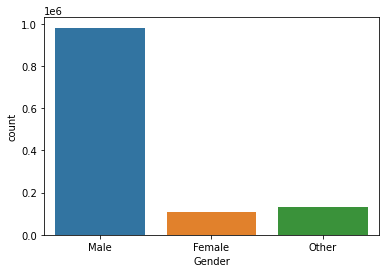

In [100]:
sns.countplot(age['Gender'])

Majority still fall under males and females. Let's move on to the next. 

## 3. Country 

From above we saw that there were over 5000 unique values for country. 

In [101]:
# top_80_countries = age['country_new'].value_counts().head(80).index

# # Replace values not in the top 80 with 'Other'
# age['country_new'] = age['country_new'].apply(lambda x: x if x in top_80_countries else 'Other')
# age['country_new'] = age['country_new'].fillna('Other')


In [102]:
age['Occupation']=age['Occupation'].astype(str)
age['Occupation']=age['Occupation'].apply(lambda x:x.split(';')[0])

age['Occupation'].value_counts()


Artist          281464
nan             206843
Politician      195219
Athlete         110942
Researcher       90678
                 ...  
Colonizer            1
Molfar               1
Tipster              1
Communist            1
Nephrologist         1
Name: Occupation, Length: 2465, dtype: int64

In [103]:
top_7_manners = age['Manner of death'].value_counts().head(7).index


age['Manner of death'] = age['Manner of death'].apply(lambda x: x if x in top_7_manners else 'Could not determine')


In [104]:
age['Manner of death'].value_counts()

Could not determine    1169461
natural causes           33522
suicide                   5786
accident                  5042
homicide                  4673
capital punishment        3387
unnatural death            308
death in battle            247
Name: Manner of death, dtype: int64

The computation is a bit too large so i have to remove the could not determine from the classes! 

In [105]:
age = age[age['Manner of death'] != 'Could not determine']
age.shape

(52965, 10)

In [106]:
age.head()

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America,Politician,1732,1799,natural causes,67
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001,natural causes,49
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865,homicide,56
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France,Egyptologist,1790,1832,natural causes,42
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926,natural causes,86


In [107]:
!pip install sentence-transformers -qq

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


In [108]:
from sentence_transformers import SentenceTransformer  



model = SentenceTransformer('all-MiniLM-L6-v2')

# Generate embeddings
embeddings = model.encode(df_mashup)

Batches:   0%|          | 0/1656 [00:00<?, ?it/s]

In [110]:


df_new = age.drop(columns = ['Id', 'Occupation','Death year'])
for col in df_new:
    df_new[col] = df_new[col].astype(str)
df_mashup = ['; '.join(df_new.iloc[i].values) for i in range(df_new.shape[0])]

In [111]:
df_mashup[:5]

['George Washington; 1st president of the United States (1732–1799); Male; United States of America; 1732; natural causes; 67',
 'Douglas Adams; English writer and humorist; Male; United Kingdom; 1952; natural causes; 49',
 'Abraham Lincoln; 16th president of the United States (1809-1865); Male; United States of America; 1809; homicide; 56',
 'Jean-François Champollion; French classical scholar; Male; Kingdom of France; 1790; natural causes; 42',
 'Claude Monet; French impressionist painter (1840-1926); Male; France; 1840; natural causes; 86']

In [112]:
embeddings.shape

(52965, 384)

In [113]:
np.save('small_embeds',embeddings)

In [125]:
from IPython.display import FileLink
FileLink('/kaggle/working/small_embeds.npy')

/kaggle/working/small_embeds.npy

In [114]:
df_new

,Name,Short description,Gender,Country,Birth year,Manner of death,Age of death
0,George Washington,1st president of the United States (1732–1799),Male,United States of America,1732,natural causes,67
1,Douglas Adams,English writer and humorist,Male,United Kingdom,1952,natural causes,49
2,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,1809,homicide,56
5,Jean-François Champollion,French classical scholar,Male,Kingdom of France,1790,natural causes,42
7,Claude Monet,French impressionist painter (1840-1926),Male,France,1840,natural causes,86
...,...,...,...,...,...,...,...
1219866,Daniela Carrasco,Chilean mime died in custody in 2019,Other,Chile,1983,homicide,36
1221308,Sara Champion,British archaeologist,Female,United Kingdom,1946,natural causes,54
1222755,Věra Kučerová,verzetstrijdster uit Tsjecho-Slowakije (1923-1...,Other,Czechoslovakia,1923,capital punishment,19
1222915,Michael Martin,born 1795; died 1821,Male,nan,1795,capital punishment,26


In [115]:
df_new.to_csv('small_df.csv', index = False)

In [116]:
from typing import List 
from sklearn.metrics.pairwise import cosine_similarity

def get_embeddings(query:str) -> np.array:
    return model.encode(query)
    

def get_similarity(target: List ,  candidates: List[List[float]]):

  candidates = np.array(candidates)
  target = np.expand_dims(np.array(target),axis=0)


  sim = cosine_similarity(target,candidates)
  sim = np.squeeze(sim).tolist()
  sort_index = np.argsort(sim)[::-1]
  sort_score = [sim[i] for i in sort_index]
  similarity_scores = zip(sort_index,sort_score)

  # Return similarity scores
  return similarity_scores

def search(new_query:str) -> pd.DataFrame:
  # Get embeddings of the new query
  new_query_embeds = get_embeddings([new_query])[0]
  top_recommendations = list(get_similarity(new_query_embeds, embeddings))[:10]
  print(top_recommendations)
  returned_listings = [ df_new.iloc[i[0]] for i in top_recommendations ]
  return pd.DataFrame(returned_listings)



In [117]:
output = search('samuel kalu; president; male; united states')

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

[(41155, 0.6214534044265747), (19935, 0.6096735000610352), (20314, 0.5898504257202148), (8612, 0.580276370048523), (24726, 0.5754036903381348), (22669, 0.5722567439079285), (20977, 0.5702211856842041), (6622, 0.5684643983840942), (37017, 0.5663122534751892), (292, 0.5587337613105774)]


In [118]:
output['Age of death'] = output['Age of death'].astype(int)
output['Age of death'].median()

62.5

In [119]:
output['Manner of death'].iloc[:10].value_counts().index[0]

'natural causes'